<a href="https://colab.research.google.com/github/RiktikaTalukder/Career-Recommendation-System/blob/main/pancancer1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/Pancancer/pc_miRNA.csv" pc_miRNA.csv
!cp "/content/drive/MyDrive/Pancancer/pc_Methy.csv" pc_Methy.csv
!cp "/content/drive/MyDrive/Pancancer/pc_CNV.csv" pc_CNV.csv
!cp "/content/drive/MyDrive/Pancancer/pc_mRNA.csv" pc_mRNA.csv
!cp "/content/drive/MyDrive/Pancancer/Pan-cancer_label_num.csv" Pan-cancer_label_num.csv

mirna = pd.read_csv("pc_miRNA.csv", index_col=0)
methy = pd.read_csv("pc_Methy.csv", index_col=0)
cnv   = pd.read_csv("pc_CNV.csv", index_col=0)
mrna  = pd.read_csv("pc_mRNA.csv", index_col=0)
labels = pd.read_csv("Pan-cancer_label_num.csv", header=None)


In [ ]:
print("Loaded omics shapes:")
print("miRNA:", mirna.shape)
print("Methy:", methy.shape)
print("CNV:", cnv.shape)
print("mRNA:", mrna.shape)

Loaded omics shapes:
miRNA: (383, 8314)
Methy: (3139, 8314)
CNV: (3105, 8314)
mRNA: (3217, 8314)


In [ ]:
labels = labels.iloc[1:]
labels.columns = ["cancer_num"]
labels = labels.reset_index(drop=True)

print("\nLabels loaded:", labels.shape)

if labels.shape[0] != mirna.shape[1]:
    raise ValueError("Mismatch: labels = {}, omics samples = {}".format(labels.shape[0], mirna.shape[1]))


Labels loaded: (8314, 1)


In [ ]:
sample_ids = mirna.columns.tolist()
labels.index = sample_ids

print("\nAssigned sample IDs to labels:")
display(labels.head())


Assigned sample IDs to labels:


,cancer_num,sample_type
TCGA-IB-AAUW-01,19,01
TCGA-AJ-A3EJ-01,29,01
TCGA-EE-A29D-06,24,06
TCGA-55-7725-01,15,01
TCGA-AO-A0JJ-01,2,01


In [ ]:
def get_sample_type(barcode):
    return barcode.split("-")[-1]

labels["sample_type"] = labels.index.map(get_sample_type)

print("\nSample type counts:")
display(labels["sample_type"].value_counts())


Sample type counts:


,count
sample_type,
01,7800
06,351
03,163


In [ ]:
KEEP_TYPES = {"01", "06"}
labels_filtered = labels[labels["sample_type"].isin(KEEP_TYPES)]

filtered_ids = labels_filtered.index.tolist()
print("\nSamples after filtering:", len(filtered_ids))


Samples after filtering: 8151


In [ ]:
mirna_f = mirna[filtered_ids]
methy_f = methy[filtered_ids]
cnv_f   = cnv[filtered_ids]
mrna_f  = mrna[filtered_ids]

y = labels_filtered["cancer_num"]

In [ ]:
X_miRNA = mirna_f.T
X_methyl = methy_f.T
X_CNV = cnv_f.T
X_mRNA = mrna_f.T

In [ ]:
print("\nFinal shapes:")
print("X_miRNA:", X_miRNA.shape)
print("X_methyl:", X_methyl.shape)
print("X_CNV:", X_CNV.shape)
print("X_mRNA:", X_mRNA.shape)
print("Labels:", y.shape)


Final shapes:
X_miRNA: (8151, 383)
X_methyl: (8151, 3139)
X_CNV: (8151, 3105)
X_mRNA: (8151, 3217)
Labels: (8151,)


In [ ]:
# Check for missing values
print("Missing values in each omics dataset:")
print("miRNA:", X_miRNA.isnull().sum().sum())
print("Methylation:", X_methyl.isnull().sum().sum())
print("CNV:", X_CNV.isnull().sum().sum())
print("mRNA:", X_mRNA.isnull().sum().sum())

# Data types and basic info
print("\nData types:")
display("miRNA:", X_miRNA.dtypes.value_counts())
display("Methylation:", X_methyl.dtypes.value_counts())
display("CNV:", X_CNV.dtypes.value_counts())
display("mRNA:", X_mRNA.dtypes.value_counts())

Missing values in each omics dataset:
miRNA: 0
Methylation: 0
CNV: 0
mRNA: 0

Data types:


'miRNA:'

,count
float64,383


'Methylation:'

,count
float64,3139


'CNV:'

,count
float64,3105


'mRNA:'

,count
float64,3217


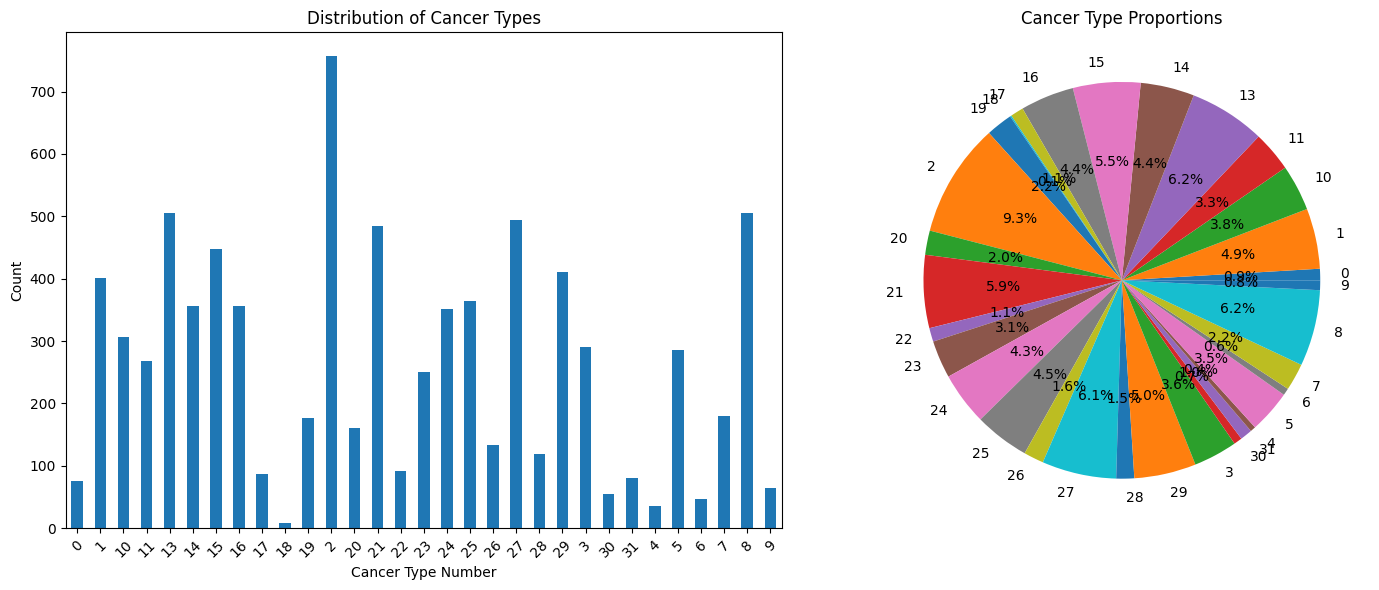

Number of unique cancer types: 31
Sample count per cancer type:
cancer_num
0      76
1     401
10    306
11    268
13    506
14    357
15    448
16    356
17     87
18      9
19    176
2     757
20    161
21    484
22     91
23    250
24    351
25    365
26    133
27    494
28    119
29    411
3     291
30     55
31     80
4      36
5     285
6      47
7     180
8     506
9      65
Name: count, dtype: int64


In [ ]:
# Cancer type distribution
plt.figure(figsize=(15, 6))
cancer_counts = y.value_counts().sort_index()
plt.subplot(1, 2, 1)
cancer_counts.plot(kind='bar')
plt.title('Distribution of Cancer Types')
plt.xlabel('Cancer Type Number')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(cancer_counts.values, labels=cancer_counts.index, autopct='%1.1f%%')
plt.title('Cancer Type Proportions')

plt.tight_layout()
plt.show()

print("Number of unique cancer types:", len(y.unique()))
print("Sample count per cancer type:")
print(cancer_counts)

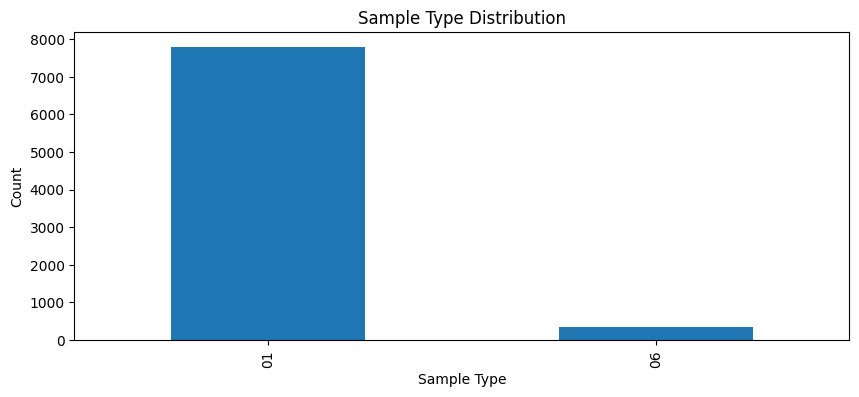

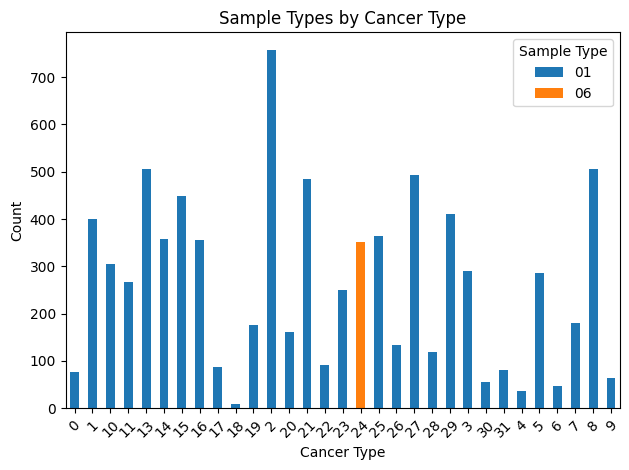

In [ ]:
# Sample type distribution
plt.figure(figsize=(10, 4))
labels_filtered['sample_type'].value_counts().plot(kind='bar')
plt.title('Sample Type Distribution')
plt.xlabel('Sample Type')
plt.ylabel('Count')


sample_type_by_cancer = pd.crosstab(labels_filtered['cancer_num'], labels_filtered['sample_type'])
sample_type_by_cancer.plot(kind='bar', stacked=True)
plt.title('Sample Types by Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.legend(title='Sample Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

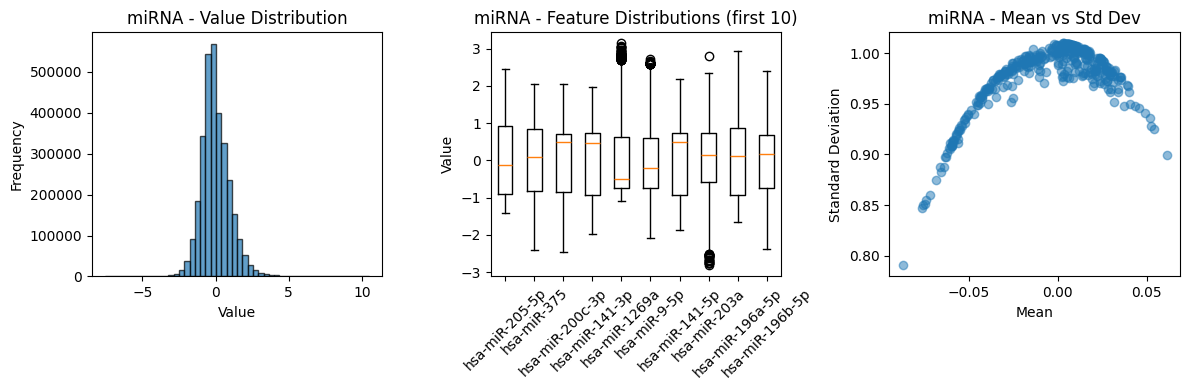


miRNA Summary Statistics:
Overall mean: -0.0057
Overall std: 0.9794
Min: -7.5521
Max: 10.4944


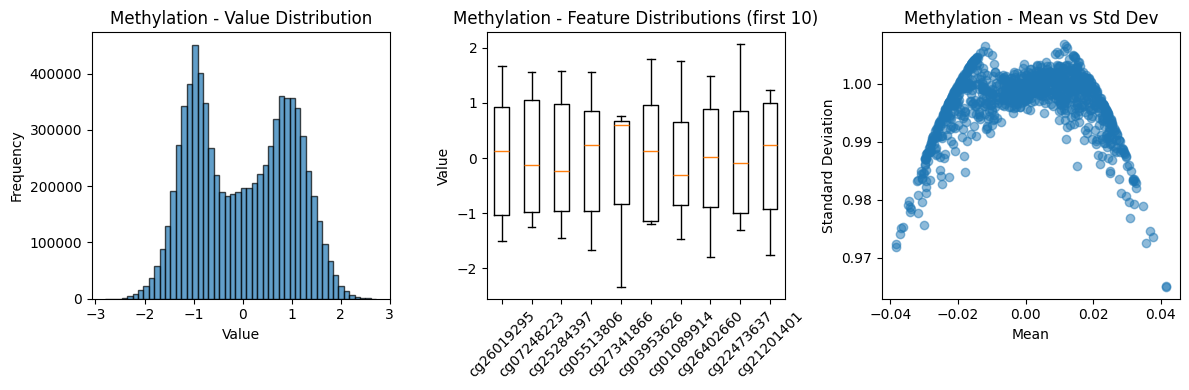


Methylation Summary Statistics:
Overall mean: -0.0003
Overall std: 0.9968
Min: -2.7968
Max: 2.7249


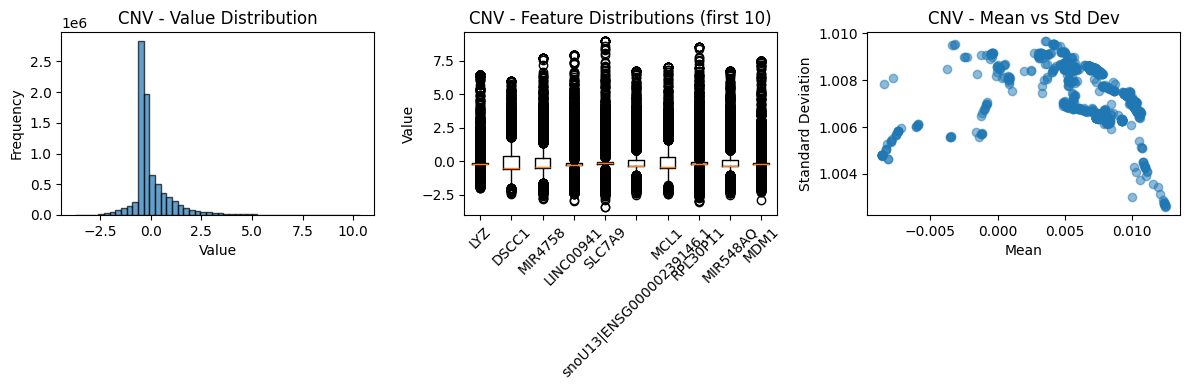


CNV Summary Statistics:
Overall mean: 0.0065
Overall std: 1.0074
Min: -3.7153
Max: 10.3105


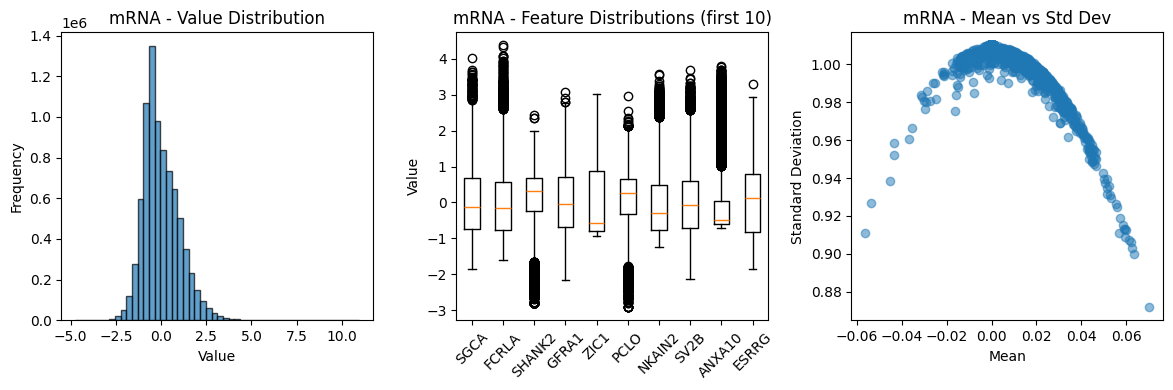


mRNA Summary Statistics:
Overall mean: 0.0105
Overall std: 0.9967
Min: -4.7376
Max: 10.9415


In [ ]:
# Function to plot feature distributions for each omics type
def plot_omics_distributions(data, title, n_samples=1000):
    """Plot distribution of randomly selected features"""
    if data.shape[1] > n_samples:
        # Sample features for visualization
        sampled_features = np.random.choice(data.columns, n_samples, replace=False)
        data = data[sampled_features]

    plt.figure(figsize=(12, 4))

    # Distribution plot
    plt.subplot(1, 3, 1)
    data_values = data.values.flatten()
    plt.hist(data_values, bins=50, alpha=0.7, edgecolor='black')
    plt.title(f'{title} - Value Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Box plot of feature distributions
    plt.subplot(1, 3, 2)
    sampled_data = data.iloc[:, :10]  # First 10 features
    plt.boxplot([sampled_data[col] for col in sampled_data.columns])
    plt.title(f'{title} - Feature Distributions (first 10)')
    plt.xticks(range(1, 11), sampled_data.columns, rotation=45)
    plt.ylabel('Value')

    # Mean vs Std deviation
    plt.subplot(1, 3, 3)
    feature_means = data.mean()
    feature_stds = data.std()
    plt.scatter(feature_means, feature_stds, alpha=0.5)
    plt.title(f'{title} - Mean vs Std Dev')
    plt.xlabel('Mean')
    plt.ylabel('Standard Deviation')

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print(f"\n{title} Summary Statistics:")
    print(f"Overall mean: {data_values.mean():.4f}")
    print(f"Overall std: {data_values.std():.4f}")
    print(f"Min: {data_values.min():.4f}")
    print(f"Max: {data_values.max():.4f}")

# Apply to each omics dataset
plot_omics_distributions(X_miRNA, "miRNA")
plot_omics_distributions(X_methyl, "Methylation")
plot_omics_distributions(X_CNV, "CNV")
plot_omics_distributions(X_mRNA, "mRNA")